In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split


# Load CSV in DF

In [32]:
df = pd.read_csv('/home/dmin/code/loic06/Forecasting-Gold-Price/raw_data/Extract_TimeFrame_60_clean.csv',sep=';')

In [33]:
df.head()

,time,open,high,low,close,Basis,Upper,Lower,Up Trend,Down Trend,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction,Unnamed: 16
0,1/11/22 0:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1790.975815,NaN,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677,NaN
1,1/11/22 1:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1792.424234,NaN,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677,NaN
2,1/11/22 2:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1793.371810,NaN,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677,NaN
3,1/11/22 3:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1795.105129,NaN,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677,NaN
4,1/11/22 4:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.398616,NaN,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677,NaN


# Copy pour éviter de tout casser

In [34]:
data = df.copy()

data.head()

,time,open,high,low,close,Basis,Upper,Lower,Up Trend,Down Trend,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction,Unnamed: 16
0,1/11/22 0:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1790.975815,NaN,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677,NaN
1,1/11/22 1:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1792.424234,NaN,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677,NaN
2,1/11/22 2:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1793.371810,NaN,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677,NaN
3,1/11/22 3:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1795.105129,NaN,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677,NaN
4,1/11/22 4:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.398616,NaN,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677,NaN


# Pas de Null detecté

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23112 entries, 0 to 23111
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 23112 non-null  object 
 1   open                 23112 non-null  float64
 2   high                 23112 non-null  float64
 3   low                  23112 non-null  float64
 4   close                23112 non-null  float64
 5   Basis                23112 non-null  float64
 6   Upper                23112 non-null  float64
 7   Lower                23112 non-null  float64
 8   Up Trend             12053 non-null  float64
 9   Down Trend           11059 non-null  float64
 10  KAMA                 23112 non-null  float64
 11  RSI                  23112 non-null  float64
 12  Bollinger Bands %b   23112 non-null  float64
 13  Bollinger BandWidth  23112 non-null  float64
 14  Highest Expansion    23112 non-null  float64
 15  Lowest Contraction   23112 non-null 

# Par simplicité, on enlève ces 3 features

In [36]:
data = data.drop(columns=['Up Trend','Down Trend','Unnamed: 16'])
data.head()

,time,open,high,low,close,Basis,Upper,Lower,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction
0,1/11/22 0:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677
1,1/11/22 1:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677
2,1/11/22 2:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677
3,1/11/22 3:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677
4,1/11/22 4:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677


# Pas de NaN detecté

In [37]:
data.isna().sum()

time                   0
open                   0
high                   0
low                    0
close                  0
Basis                  0
Upper                  0
Lower                  0
KAMA                   0
RSI                    0
Bollinger Bands %b     0
Bollinger BandWidth    0
Highest Expansion      0
Lowest Contraction     0
dtype: int64

# Etude de la corrélation entre features

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23112 entries, 0 to 23111
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 23112 non-null  object 
 1   open                 23112 non-null  float64
 2   high                 23112 non-null  float64
 3   low                  23112 non-null  float64
 4   close                23112 non-null  float64
 5   Basis                23112 non-null  float64
 6   Upper                23112 non-null  float64
 7   Lower                23112 non-null  float64
 8   KAMA                 23112 non-null  float64
 9   RSI                  23112 non-null  float64
 10  Bollinger Bands %b   23112 non-null  float64
 11  Bollinger BandWidth  23112 non-null  float64
 12  Highest Expansion    23112 non-null  float64
 13  Lowest Contraction   23112 non-null  float64
dtypes: float64(13), object(1)
memory usage: 2.5+ MB


# Conversion en datetime

In [39]:
data['time'] = pd.to_datetime(data['time'], format="%m/%d/%y %H:%M")

In [40]:
data = data.sort_values('time').reset_index(drop=True)
data = data.set_index('time')

In [42]:
data.head(5)

,open,high,low,close,Basis,Upper,Lower,KAMA,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction
time,,,,,,,,,,,,,
2022-01-11 00:00:00,1801.23,1802.85,1800.03,1801.18,1796.565,1802.85,1790.28,1795.256156,65.669045,0.831694,0.803134,2.519134,0.332677
2022-01-11 01:00:00,1801.16,1804.61,1801.15,1802.70,1797.445,1804.61,1790.28,1795.536505,69.806836,0.888896,0.826182,2.519134,0.332677
2022-01-11 02:00:00,1802.68,1805.91,1802.00,1804.85,1798.095,1805.91,1790.28,1795.896520,74.665739,0.963492,0.876434,2.519134,0.332677
2022-01-11 03:00:00,1804.83,1806.31,1804.21,1805.18,1798.295,1806.31,1790.28,1796.250762,75.350694,0.925586,0.917716,2.519134,0.332677
2022-01-11 04:00:00,1805.18,1807.73,1804.99,1805.91,1799.005,1807.73,1790.28,1796.635508,76.904655,0.915073,0.952947,2.519134,0.332677


In [43]:
data.dtypes

open                   float64
high                   float64
low                    float64
close                  float64
Basis                  float64
Upper                  float64
Lower                  float64
KAMA                   float64
RSI                    float64
Bollinger Bands %b     float64
Bollinger BandWidth    float64
Highest Expansion      float64
Lowest Contraction     float64
dtype: object

<Axes: >

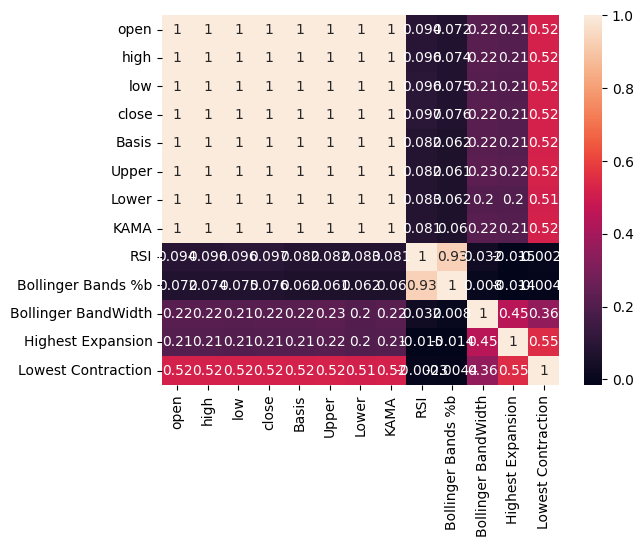

In [44]:
correlation_matrix = data.select_dtypes('float').corr()
sns.heatmap(correlation_matrix,annot=True)

# On vire toutes les features extremement corrélées à notre target 'close'

In [45]:
data = data.drop(columns=['open','high','low','Basis','Upper','Lower','KAMA'])

<Axes: >

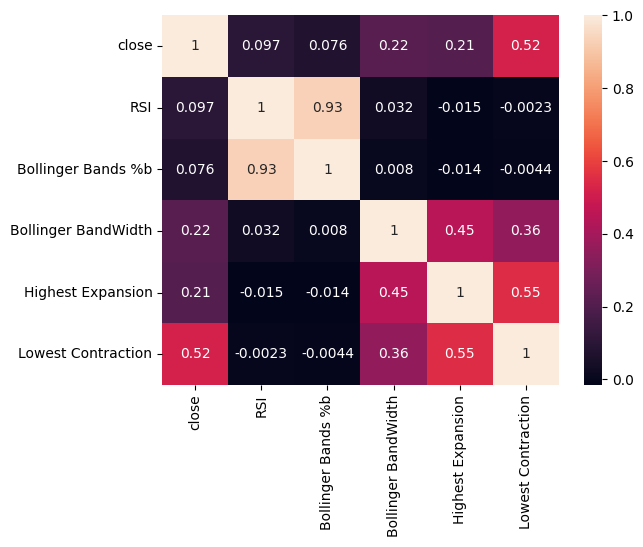

In [46]:
correlation_matrix = data.select_dtypes('float').corr()
sns.heatmap(correlation_matrix,annot=True)

# On définit la cible alignée à t:

In [47]:
# cible = close à l’instant suivant
data['target_close_t'] = data['close'].shift(-1)

In [17]:
data

,time,close,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction,target_close_t
0,2022-01-11 00:00:00,1801.18,65.669045,0.831694,0.803134,2.519134,0.332677,1802.70
1,2022-01-11 01:00:00,1802.70,69.806836,0.888896,0.826182,2.519134,0.332677,1804.85
2,2022-01-11 02:00:00,1804.85,74.665739,0.963492,0.876434,2.519134,0.332677,1805.18
3,2022-01-11 03:00:00,1805.18,75.350694,0.925586,0.917716,2.519134,0.332677,1805.91
4,2022-01-11 04:00:00,1805.91,76.904655,0.915073,0.952947,2.519134,0.332677,1806.72
...,...,...,...,...,...,...,...,...
23107,2025-12-09 05:00:00,4186.93,40.948451,0.232289,0.812984,1.597454,0.502537,4179.83
23108,2025-12-09 06:00:00,4179.83,35.173900,0.072570,0.821917,1.597454,0.502537,4182.07
23109,2025-12-09 07:00:00,4182.07,38.263925,0.168487,0.805397,1.597454,0.502537,4182.43
23110,2025-12-09 08:00:00,4182.43,38.791435,0.209285,0.802265,1.597454,0.502537,4191.42


## Le premier point perd ses lags, le dernier perd la cible ==> il faut les traiter

In [48]:
data = data.dropna()
data

,close,RSI,Bollinger Bands %b,Bollinger BandWidth,Highest Expansion,Lowest Contraction,target_close_t
time,,,,,,,
2022-01-11 00:00:00,1801.18,65.669045,0.831694,0.803134,2.519134,0.332677,1802.70
2022-01-11 01:00:00,1802.70,69.806836,0.888896,0.826182,2.519134,0.332677,1804.85
2022-01-11 02:00:00,1804.85,74.665739,0.963492,0.876434,2.519134,0.332677,1805.18
2022-01-11 03:00:00,1805.18,75.350694,0.925586,0.917716,2.519134,0.332677,1805.91
2022-01-11 04:00:00,1805.91,76.904655,0.915073,0.952947,2.519134,0.332677,1806.72
...,...,...,...,...,...,...,...
2025-12-09 04:00:00,4194.60,48.611910,0.428196,0.816777,1.597454,0.502537,4186.93
2025-12-09 05:00:00,4186.93,40.948451,0.232289,0.812984,1.597454,0.502537,4179.83
2025-12-09 06:00:00,4179.83,35.173900,0.072570,0.821917,1.597454,0.502537,4182.07


In [49]:
X = data.drop(columns=['target_close_t'])
y= data[['target_close_t']]

In [50]:
y.isna().sum()

target_close_t    0
dtype: int64

# Split time based (sans shuffle) Pas utilisé ici

In [21]:
#from sklearn.model_selection import TimeSeriesSplit

#tscv = TimeSeriesSplit(n_splits=5)

# Define XGBoost Model

In [ ]:
# Split data into train, test and validation sets
#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, test_size = 0.3, random_state = 42  # TEST = 30%
#)

# Use the same function above for the validation set
#X_test, X_val, y_test, y_val = train_test_split(
    #X_test, y_test, test_size = 0.5, random_state = 42  # TEST = 15%
#)

In [51]:
n = len(X)

train_size = int(n * 0.70)
val_size   = int(n * 0.15)

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:train_size + val_size]
y_val = y.iloc[train_size:train_size + val_size]

X_test = X.iloc[train_size + val_size:]
y_test = y.iloc[train_size + val_size:]

In [58]:
y_val

,target_close_t
time,
2024-10-07 17:00:00,2646.84
2024-10-07 18:00:00,2648.00
2024-10-07 19:00:00,2640.86
2024-10-07 20:00:00,2643.29
2024-10-07 21:00:00,2642.62
...,...
2025-05-09 16:00:00,3345.06
2025-05-09 17:00:00,3336.87
2025-05-09 18:00:00,3340.98


# Training and Validation

In [59]:
model = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1, early_stopping_rounds=5)

# early_stopping_rounds est accepté dans fit()
model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train),(X_val, y_val)],
        verbose=True,
)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#mae_scores.append(mae); rmse_scores.append(rmse)

print(f"MAE={mae:.3f} | RMSE={rmse:.3f}")

[0]	validation_0-rmse:212.28769	validation_1-rmse:828.68413
[1]	validation_0-rmse:191.14779	validation_1-rmse:775.37574
[2]	validation_0-rmse:172.11576	validation_1-rmse:727.37031
[3]	validation_0-rmse:154.98035	validation_1-rmse:684.82206
[4]	validation_0-rmse:139.55510	validation_1-rmse:644.97496
[5]	validation_0-rmse:125.66778	validation_1-rmse:610.84834
[6]	validation_0-rmse:113.16616	validation_1-rmse:579.10667
[7]	validation_0-rmse:101.91050	validation_1-rmse:550.40760
[8]	validation_0-rmse:91.77653	validation_1-rmse:525.04963
[9]	validation_0-rmse:82.65360	validation_1-rmse:502.74113
[10]	validation_0-rmse:74.44237	validation_1-rmse:482.37185
[11]	validation_0-rmse:67.05228	validation_1-rmse:464.42476
[12]	validation_0-rmse:60.40020	validation_1-rmse:448.66387
[13]	validation_0-rmse:54.41373	validation_1-rmse:434.64727
[14]	validation_0-rmse:49.02652	validation_1-rmse:421.73403
[15]	validation_0-rmse:44.17940	validation_1-rmse:410.00452
[16]	validation_0-rmse:39.81824	validation

In [62]:
y_pred = pd.Series(y_pred, index=y_test.index)
y_pred

time
2025-05-09 21:00:00    2625.989502
2025-05-09 22:00:00    2625.989502
2025-05-12 00:00:00    2624.585938
2025-05-12 01:00:00    2625.680176
2025-05-12 02:00:00    2623.923828
                          ...     
2025-12-09 04:00:00    2652.408691
2025-12-09 05:00:00    2649.140869
2025-12-09 06:00:00    2647.346924
2025-12-09 07:00:00    2647.163330
2025-12-09 08:00:00    2649.482422
Length: 3468, dtype: float32

# Plot

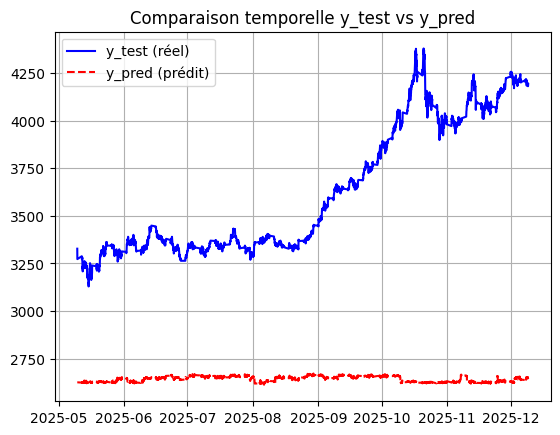

In [63]:
plt.plot(y_test.index, y_test, label="y_test (réel)", color="blue")
plt.plot(y_pred.index, y_pred, label="y_pred (prédit)", color="red", linestyle="--")

plt.legend()
plt.grid(True)
plt.title("Comparaison temporelle y_test vs y_pred")
plt.show()

In [26]:
pd.DataFrame(y_pred)

,0
0,1629.524170
1,1916.940063
2,1705.470215
3,2022.494263
4,1666.469360
...,...
3462,4008.954102
3463,2903.831787
3464,2376.924561
3465,3648.608887


In [27]:
y_test

,target_close_t
4618,1642.52
9801,1920.94
3912,1708.68
11449,2025.86
4685,1668.47
...,...
22498,4010.50
18240,2897.96
14681,2372.78
21626,3666.16
